## Custom Models

#### When you are building your own custom model and it does not fit into any categories of modoling framework that MLflow provides, you can still make it compatible.

In [4]:
import mlflow 
from mlflow_utils import create_mlflow_experiment

class CustomModel(mlflow.pyfunc.PythonModel): # specify mlflow.pyfunc.PythonModel 

    def __init__(self):
        pass 

    def fit(self):
        print("Fitting model...")

    def predict(self, context, model_input:list[str]):
        return self.get_prediction(model_input)
    
    def get_prediction(self, model_input:list[str]):
        # do something with the model input
        return " ".join([w.upper() for w in model_input])
    

if __name__=="__main__":

    experiment_id = create_mlflow_experiment(
        experiment_name= "CustomModel",
        artifact_location= "custom_model_artifacts",
        tags={"purpose":"learning"}
    )

    with mlflow.start_run(experiment_id=experiment_id, run_name="custom_model_run") as run:
        custom_model = CustomModel()

        custom_model.fit()

        mlflow.pyfunc.log_model(
            artifact_path="custom_model",
            python_model=custom_model)
        
        mlflow.log_param("param1", "value1")

        # load model with pyfunc
        custom_model = mlflow.pyfunc.load_model(f"runs:/{run.info.run_id}/custom_model")

        prediction = custom_model.predict(["Custom", "Prediction"])
        print(prediction)

2025/03/04 12:07:01 INFO mlflow.models.signature: Inferring model signature from type hints


Fitting model...
CUSTOM PREDICTION


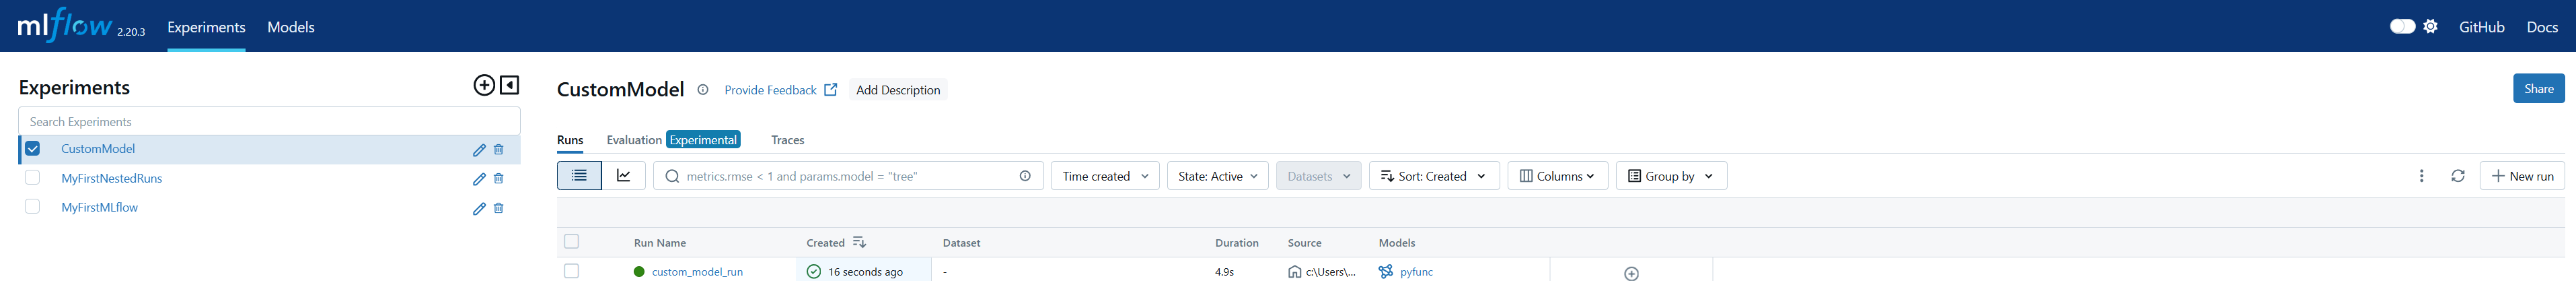

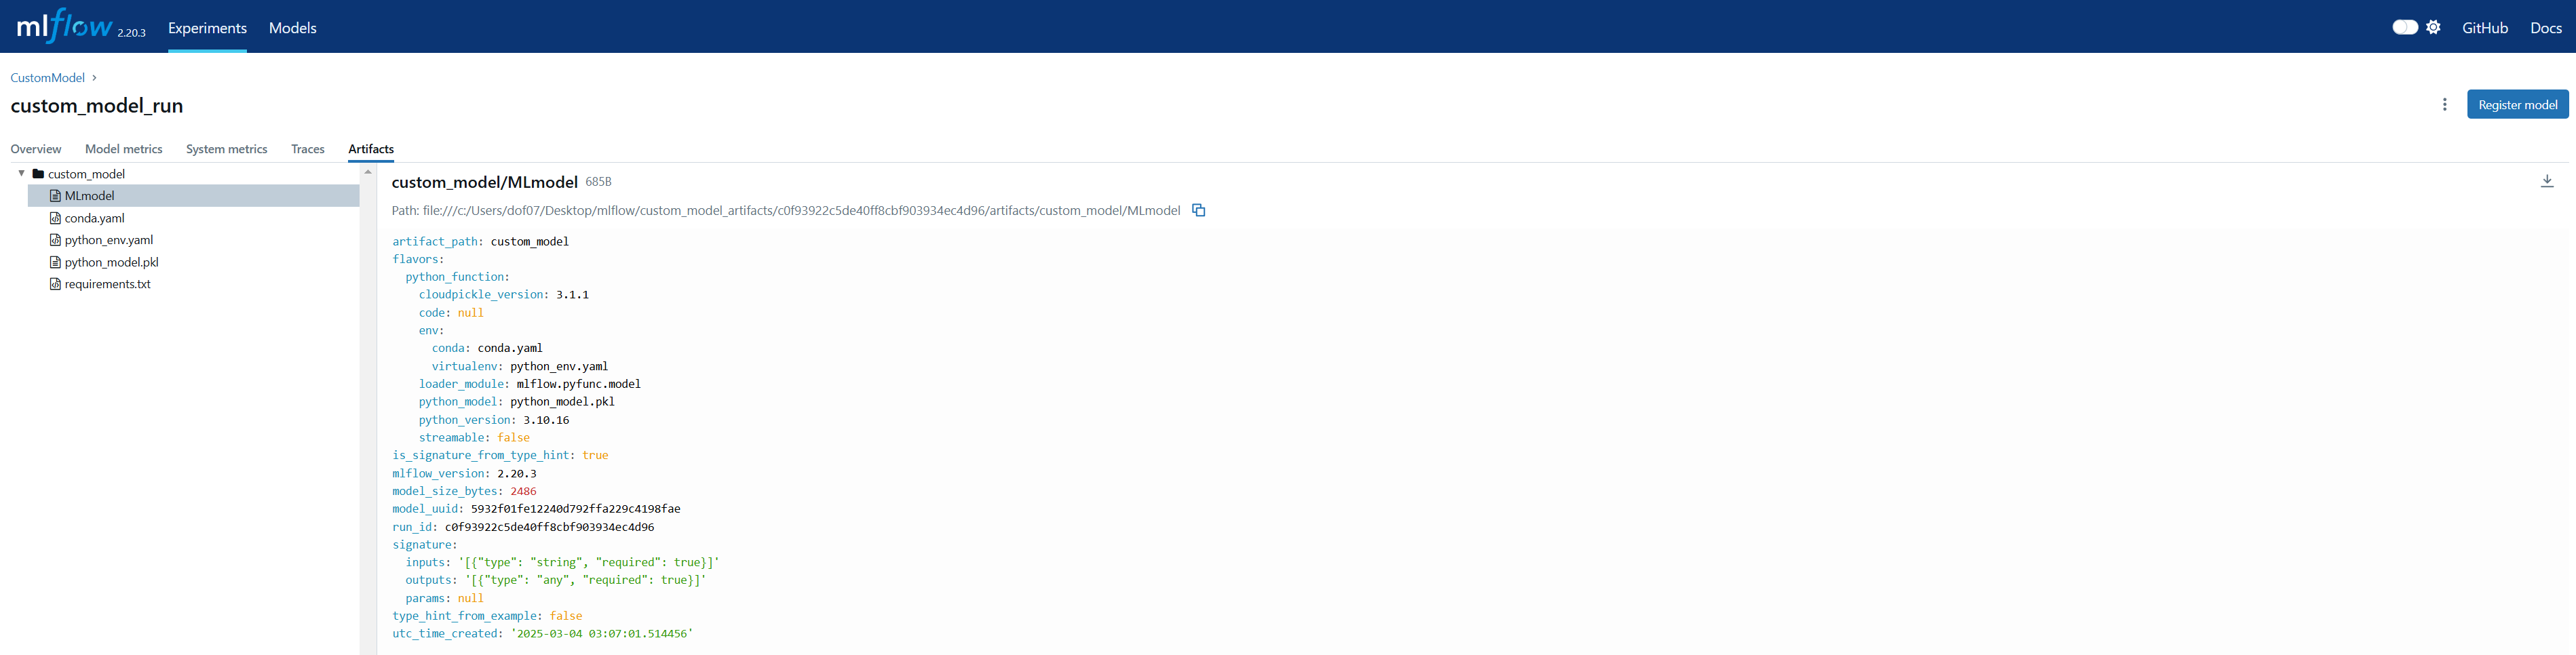